Team name: Team Hilbert Space

Student IDs: PLACEHOLDER

Michael Moen Allport & Jonas Sandberg

Challenge 1

# Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
with open('datasets/challenge1_train.csv') as train_csv:
        df = pd.read_csv(train_csv, skipinitialspace=True)
labels = df['target']
features = df.drop(columns=['target','id'])
df.head()

id  target         f0   f1      f2 f3   f4   f5   f6         f7  ...  \
0   0       0  254e988c9  0.0  6.8928  a  0.0  0.2  0.3  3829ad8a4  ...   
1   1       0  e3282379d  0.0  6.8098  n  NaN  0.0  0.1  fd943bc67  ...   
2   2       0  c362abead  1.0  6.7761  k  0.0  0.1  0.0  b770c0db2  ...   
3   3       0  84ab3eece  0.0  6.9302  i  3.0  0.2  0.3  5968f0acd  ...   
4   4       0  a16717598  0.0  7.0238  e  4.0  0.1  0.4  221405824  ...   

         f15  f16  f17   f18  f19  f20  f21  f22        f23        f24  
0  79df04ed6    A  2.0  51.0  3.0  1.0    D  0.0  6d3db6c57  a7059911d  
1  2815e62ea    U  0.0  10.0  1.0  3.0    E  0.0  abce980f5  e60e65034  
2  8496c8e33    Q  1.0  16.0  3.0  0.0  NaN  0.0  63dde2492  d3d8f55e0  
3  b31517d23  NaN  1.0  63.0  3.0  0.0    E  0.0  cb0d7da76  3600c6e91  
4  6327fb08b    H  1.0  26.0  NaN  3.0    A  0.0  8ce034bb6  93360bbc9  

[5 rows x 27 columns]

We see that we have a variety of data types. Some columns are hex values, others are categorical, float or boolean values.
Lets check out the amount of missing values to see if there any outliers:

<BarContainer object of 25 artists>

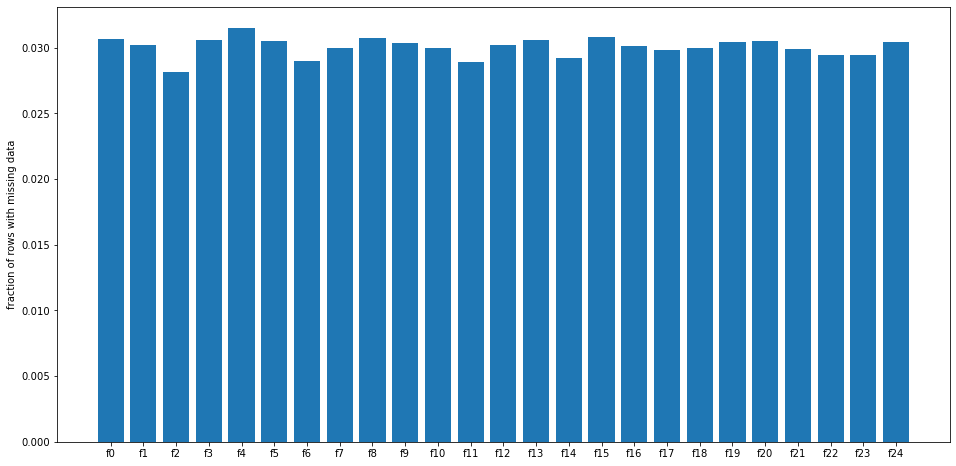

In [3]:
import matplotlib.pyplot as plt
import numpy as np
null_counts = features.isna().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index)
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

While we do have a fair amount of missing values, 3% is manageable and there are no outliers between columns.

In [4]:
features.describe()

f1            f2            f4            f5            f6  \
count  48492.000000  48594.000000  48424.000000  48473.000000  48552.000000   
mean       0.093356      6.988378      3.094148      0.146263      0.310677   
std        0.290933      0.152945      1.845653      0.065318      0.185038   
min        0.000000      6.521800      0.000000      0.000000      0.000000   
25%        0.000000      6.870225      1.000000      0.100000      0.200000   
50%        0.000000      6.987500      4.000000      0.200000      0.400000   
75%        0.000000      7.102300      5.000000      0.200000      0.500000   
max        1.000000      7.479400      5.000000      0.200000      0.500000   

                 f8          f10           f11          f12           f13  \
count  48463.000000  48500.00000  48553.000000  48491.00000  48471.000000   
mean       6.350866      0.53732      0.276626      4.11532      0.037251   
std        3.455614      0.49861      0.447334      2.03611      0.048348   
min        1.000000      0.00000      0.000000      1.00000      0.000000   
25%        3.000000      0.00000      0.000000      2.00000      0.000000   
50%        6.000000      1.00000      0.000000      5.00000      0.000000   
75%        8.000000      1.00000      1.000000      6.00000      0.100000   
max       12.000000      1.00000      1.000000      7.00000      0.100000   

                f17           f18           f19           f20           f22  
count  48509.000000  48501.000000  48478.000000  48475.000000  48530.000000  
mean       0.648003     62.147378      1.955196      1.889964      0.183721  
std        0.823160     33.086578      0.853246      1.529719      0.387261  
min        0.000000      1.000000      1.000000      0.000000      0.000000  
25%        0.000000     32.000000      1.000000      0.000000      0.000000  
50%        0.000000     65.000000      2.000000      2.000000      0.000000  
75%        1.000000     94.000000      3.000000      3.000000      0.000000  
max        3.000000    104.000000      3.000000      4.000000      1.000000

While pandas describe() is decent for gettting a brief overview of the dataset, it can sometimes be misleading. A standard deviation of 3.4 in column f8 might be worrying until one realizes that the column has 12 distinct values and is probably best represented ordinally.

A more powerful tool is "Pandas profiling", and is far more useful for data exploration.

In [5]:
import pandas_profiling
from pandas_profiling import ProfileReport

profile = ProfileReport(df.drop(columns=['id']))
profile

There's a lot going on in this report, so let's break the different aspects into parts.

# Data types

We essentially have five different data types:

In [6]:
numeric_features     = ['f2', 'f18']
hexadecimal_features = ['f0', 'f7', 'f15', 'f23', 'f24']
boolean_features     = ['f1', 'f10', 'f11', 'f13', 'f22']
ordinal_features     = ['f4', 'f5', 'f6', 'f8', 'f12', 'f17', 'f19', 'f20']
categorical_features = ['f3', 'f9', 'f14', 'f16', 'f21']

We have 5 columns with hexadecimal numbers, so we need to convert them to a numeric type. It could also be argued that certain columns with hexadecimal numbers should be represented as categorical features if the number of distinct rows is low enough, for example column f23 and f24.

# Imbalanced classes

We see that the targets are heavily favored towards "0". This needs to be dealt with, so our model doesn't heavily lean towards guessing "0". It also impacts the metrics we use to evaluate our model, given that a model that always guesses "0" will have an 80% accuracy.

# Correlations

We see that the only correlation relationships are very weak. This is good, because correlated columns can have adverse effects on certain classification algorithms, like Logistic Regression and Random Forest. However, the data is not processed, so the report might be misleading - hex columns are treated as categorical values, for example. Let's pre-process and quantify how strong the relationships are - to do that we need to use different algorithms for the numeric features and categorical features. As far as we aware, there is no clear-cut way to quantify the relationship between categorical columns, so we focus on numerical column correlation.

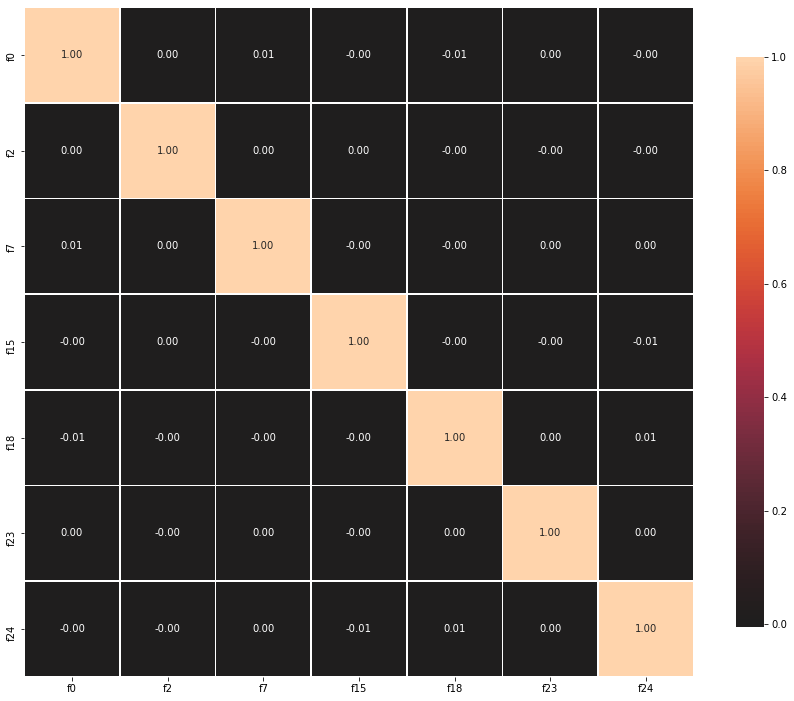

In [16]:
import sklearn as sk
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from itertools import combinations
from scipy.stats import chi2_contingency, pearsonr
from sklearn.impute import SimpleImputer


def conv_hex(x):
    try:
        return int(x, 16)
    except ValueError:
        return np.nan
    except TypeError:
        return np.nan
    
def analyze_corr(features, labels):
    # Need to impute, pearson doesn't take nan values
    median_impute = SimpleImputer(strategy='median')

    for i in range(25):
        feature = "f" + str(i)
        if feature in hexadecimal_features:
            features[feature] = features[feature].apply(lambda x: conv_hex(x))
            features[feature] = median_impute.fit_transform(np.array(features[feature]).reshape(-1,1))

        if feature in (numeric_features):
            features[feature] = median_impute.fit_transform(np.array(features[feature]).reshape(-1,1))

    
    min_max_scaler = MinMaxScaler()
    
    df_num = features[features.columns & (numeric_features + hexadecimal_features)]
    df_num = pd.DataFrame(min_max_scaler.fit_transform(df_num), columns=df_num.columns, index=df_num.index)
    
    correlations = df_num.corr(method="pearson")

    fig, ax = plt.subplots(figsize=(15,15))
    heatmap = sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})

analyze_corr(features.copy(),labels)